In [24]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


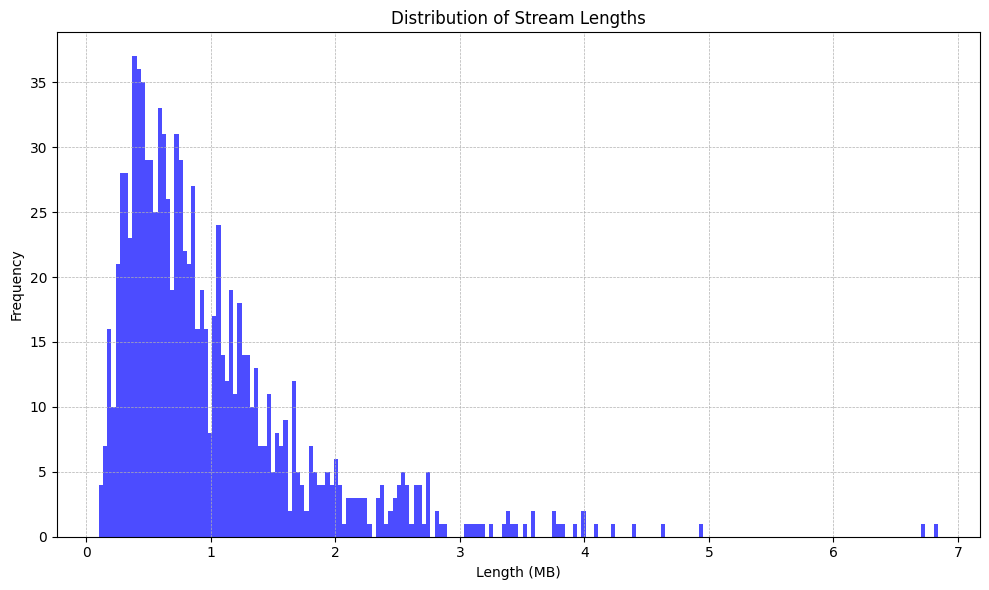

In [25]:
import numpy as np

# Parameters for the lognormal distribution
num_arrays = 1000
mode = 800*1024
mean = 1*1024*1024

mu = np.log(mode)
sigma = np.sqrt(2*(np.log(mean) - mu))

# Generate the lengths
lengths = np.random.lognormal(mean=mu, sigma=sigma, size=num_arrays).astype(int)

# Cap at 10MB
lengths = np.minimum(lengths, 10*1024*1024)

# Generate the bytearrays
byte_arrays = [bytearray(np.random.rand(l)) for l in lengths]

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(lengths / (1024*1024), bins=200, color='blue', alpha=0.7)  # Convert lengths to MB for plotting
plt.title('Distribution of Stream Lengths')
plt.xlabel('Length (MB)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [31]:
import binascii
from pyeclib.ec_iface import ECDriver

# Instantiate ECDriver
ec_driver = ECDriver(k=6, m=2, ec_type='liberasurecode_rs_vand')

# Encode data
data_to_encode = bytes.fromhex('11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111')
encoded_data = ec_driver.encode(data_to_encode)

print(f"Size of original data: {len(data_to_encode)} bytes")

for idx, chunk in enumerate(encoded_data):
    hex_chunk = binascii.hexlify(chunk).decode('utf-8')
    print(f"Size of encoded data: chunk({idx}) {len(chunk)} bytes")
    print(f"Encoded chunk {idx}: {hex_chunk}")

Size of original data: 64 bytes
Size of encoded data: chunk(0) 92 bytes
Encoded chunk 0: 000000000c000000000000004000000000000000010000000000000000000000000000000000000000000000000000000000000000000600000100cc5e0c0b020601003d54e3d9000000000000000000111111111111111111111111
Size of encoded data: chunk(1) 92 bytes
Encoded chunk 1: 010000000c000000000000004000000000000000010000000000000000000000000000000000000000000000000000000000000000000600000100cc5e0c0b02060100cc51afb0000000000000000000111111111111111111111111
Size of encoded data: chunk(2) 92 bytes
Encoded chunk 2: 020000000c000000000000004000000000000000010000000000000000000000000000000000000000000000000000000000000000000600000100cc5e0c0b02060100df5f7b0b000000000000000000111111111111111111111111
Size of encoded data: chunk(3) 92 bytes
Encoded chunk 3: 030000000c000000000000004000000000000000010000000000000000000000000000000000000000000000000000000000000000000600000100cc5e0c0b020601002e5a3762000000000000000000111111111111111111111111


In [1]:
def calculate_thresholds(km_pairs, overhead):
    thresholds = {}
    for K, M in km_pairs:
        try:
            data_size_threshold = (overhead * (K + M) * K) / (M - ((K + M) / K))
            thresholds[(K, M)] = data_size_threshold
        except ZeroDivisionError:
            thresholds[(K, M)] = float('inf')  # FEC never beneficial
    return thresholds

km_pairs = [(4, 2), (6, 2), (8, 2), (10, 2), (12, 2), (14, 2), (16, 4)]  # Example setups
overhead = 80  # Overhead per strip
thresholds = calculate_thresholds(km_pairs, overhead)

for km, threshold in thresholds.items():
    print(f"Optimal threshold for {km[0]}+{km[1]} setup: {threshold:.2f} bytes")


Optimal threshold for 4+2 setup: 3840.00 bytes
Optimal threshold for 6+2 setup: 5760.00 bytes
Optimal threshold for 8+2 setup: 8533.33 bytes
Optimal threshold for 10+2 setup: 12000.00 bytes
Optimal threshold for 12+2 setup: 16128.00 bytes
Optimal threshold for 14+2 setup: 20906.67 bytes
Optimal threshold for 16+4 setup: 9309.09 bytes


In [4]:
def calculate_max_incoming_bandwidth(K, M, total_bandwidth=1e9):  # 1 Gbit in bits
    # Calculate for FEC
    incoming_fec = total_bandwidth * (K / (K + M))
    
    # Calculate for Replication
    incoming_rep = total_bandwidth / (M + 1)
    
    return incoming_fec, incoming_rep

# Define a set of popular K + M combinations
configurations = [
    (4, 2),
    (6, 2),
    (8, 2),
    (10, 2),
    (10, 3),
    (12, 3),
    (14, 3),
    (16, 4)
]

# Iterate over each configuration
for K, M in configurations:
    incoming_fec, incoming_rep = calculate_max_incoming_bandwidth(K, M)
    print(f"For {K}+{M} configuration:")
    print(f"  FEC approach: Maximum incoming bandwidth is {incoming_fec/1e9:.3f} Gbit")
    print(f"  Replication approach: Maximum incoming bandwidth is {incoming_rep/1e9:.3f} Gbit\n")


For 4+2 configuration:
  FEC approach: Maximum incoming bandwidth is 0.667 Gbit
  Replication approach: Maximum incoming bandwidth is 0.333 Gbit

For 6+2 configuration:
  FEC approach: Maximum incoming bandwidth is 0.750 Gbit
  Replication approach: Maximum incoming bandwidth is 0.333 Gbit

For 8+2 configuration:
  FEC approach: Maximum incoming bandwidth is 0.800 Gbit
  Replication approach: Maximum incoming bandwidth is 0.333 Gbit

For 10+2 configuration:
  FEC approach: Maximum incoming bandwidth is 0.833 Gbit
  Replication approach: Maximum incoming bandwidth is 0.333 Gbit

For 10+3 configuration:
  FEC approach: Maximum incoming bandwidth is 0.769 Gbit
  Replication approach: Maximum incoming bandwidth is 0.250 Gbit

For 12+3 configuration:
  FEC approach: Maximum incoming bandwidth is 0.800 Gbit
  Replication approach: Maximum incoming bandwidth is 0.250 Gbit

For 14+3 configuration:
  FEC approach: Maximum incoming bandwidth is 0.824 Gbit
  Replication approach: Maximum incoming